In [14]:
import sys
sys.path.append('../')

import torch 
import torch.nn as nn 
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from tqdm import trange

from models.regression import Network
from compute_ntk import get_ntk, get_fnet_single
from utils import get_relative_norm
from boston.dataset import BostonDataset

DEVICE="cuda"

In [16]:
dataset = BostonDataset(path="../boston/Boston.csv")

x_ntk = torch.stack([dataset[i][0] for i in range(100)]).to(DEVICE)

In [17]:
EPOCHS=50
ITER=5

results_dict = {
    50:[[0] for _ in range(ITER)],
    100:[[0] for _ in range(ITER)],
    500:[[0] for _ in range(ITER)],
    1000:[[0] for _ in range(ITER)],
    5000:[[0] for _ in range(ITER)],
    10000:[[0] for _ in range(ITER)],
}

In [18]:
for dim in results_dict.keys():
    for iter in range(ITER):
        print(f'*** Working on model {dim} , iter {iter+1}/{ITER} ***')

        model = Network(dim).to(DEVICE)
        parameters = {k:v.detach() for k, v in model.named_parameters()}

        fnet_single = get_fnet_single(model)
        
        criterion = nn.MSELoss()
        optimizer = optim.Adam(model.parameters(), lr=1e-5)

        ntk_init = get_ntk(fnet_single, parameters, x_ntk, multi=False)

        pbar = trange(EPOCHS)
        for epoch in pbar:
            epoch_loss = 0
            for x, y in dataset:
                x, y = x.to(DEVICE), y.to(DEVICE)
                pred = model(x)
                loss = criterion(pred, y)
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
                epoch_loss+=loss.item()

            pbar.set_description(f"for epoch {epoch/1}/{EPOCHS} ; training loss : {epoch_loss}")

            parameters = {k:v.detach() for k, v in model.named_parameters()}
            ntk = get_ntk(fnet_single, parameters, x_ntk, multi=False)
            rel_norm = get_relative_norm(ntk, ntk_init)
            results_dict[dim][iter].append(rel_norm)

*** Working on model 50 , iter 1/5 ***


for epoch 49.0/50 ; training loss : 206546.077003479: 100%|██████████| 50/50 [00:14<00:00,  3.50it/s]  


*** Working on model 50 , iter 2/5 ***


for epoch 49.0/50 ; training loss : 195398.7320829073: 100%|██████████| 50/50 [00:15<00:00,  3.33it/s] 


*** Working on model 50 , iter 3/5 ***


for epoch 49.0/50 ; training loss : 200128.1303935051: 100%|██████████| 50/50 [00:14<00:00,  3.55it/s] 


*** Working on model 50 , iter 4/5 ***


for epoch 49.0/50 ; training loss : 217387.95042456686: 100%|██████████| 50/50 [00:14<00:00,  3.47it/s]


*** Working on model 50 , iter 5/5 ***


for epoch 49.0/50 ; training loss : 201693.0243806243: 100%|██████████| 50/50 [00:14<00:00,  3.45it/s] 


*** Working on model 100 , iter 1/5 ***


for epoch 49.0/50 ; training loss : 129891.91164171696: 100%|██████████| 50/50 [00:14<00:00,  3.41it/s]


*** Working on model 100 , iter 2/5 ***


for epoch 49.0/50 ; training loss : 146910.80168462172: 100%|██████████| 50/50 [00:14<00:00,  3.42it/s]


*** Working on model 100 , iter 3/5 ***


for epoch 49.0/50 ; training loss : 159930.47812204325: 100%|██████████| 50/50 [00:14<00:00,  3.36it/s]


*** Working on model 100 , iter 4/5 ***


for epoch 49.0/50 ; training loss : 141597.48757661693: 100%|██████████| 50/50 [00:14<00:00,  3.37it/s]


*** Working on model 100 , iter 5/5 ***


for epoch 49.0/50 ; training loss : 157759.00319248438: 100%|██████████| 50/50 [00:14<00:00,  3.34it/s]


*** Working on model 500 , iter 1/5 ***


for epoch 49.0/50 ; training loss : 23045.229350623267: 100%|██████████| 50/50 [00:15<00:00,  3.32it/s]


*** Working on model 500 , iter 2/5 ***


for epoch 49.0/50 ; training loss : 20838.092721154364: 100%|██████████| 50/50 [00:15<00:00,  3.32it/s]


*** Working on model 500 , iter 3/5 ***


for epoch 49.0/50 ; training loss : 21008.56969187595: 100%|██████████| 50/50 [00:15<00:00,  3.32it/s] 


*** Working on model 500 , iter 4/5 ***


for epoch 49.0/50 ; training loss : 22937.193613712094: 100%|██████████| 50/50 [00:15<00:00,  3.31it/s]


*** Working on model 500 , iter 5/5 ***


for epoch 49.0/50 ; training loss : 21335.821488136837: 100%|██████████| 50/50 [00:15<00:00,  3.27it/s]


*** Working on model 1000 , iter 1/5 ***


for epoch 49.0/50 ; training loss : 14035.217612800887: 100%|██████████| 50/50 [00:15<00:00,  3.23it/s]


*** Working on model 1000 , iter 2/5 ***


for epoch 49.0/50 ; training loss : 13490.764399808832: 100%|██████████| 50/50 [00:15<00:00,  3.26it/s]


*** Working on model 1000 , iter 3/5 ***


for epoch 49.0/50 ; training loss : 13399.5589874836: 100%|██████████| 50/50 [00:15<00:00,  3.24it/s]  


*** Working on model 1000 , iter 4/5 ***


for epoch 49.0/50 ; training loss : 13456.680757986182: 100%|██████████| 50/50 [00:15<00:00,  3.26it/s]


*** Working on model 1000 , iter 5/5 ***


for epoch 49.0/50 ; training loss : 13902.187615009901: 100%|██████████| 50/50 [00:15<00:00,  3.20it/s]


*** Working on model 5000 , iter 1/5 ***


for epoch 49.0/50 ; training loss : 7570.709306513541: 100%|██████████| 50/50 [00:16<00:00,  3.08it/s] 


*** Working on model 5000 , iter 2/5 ***


for epoch 49.0/50 ; training loss : 7547.3648619102605: 100%|██████████| 50/50 [00:16<00:00,  3.09it/s]


*** Working on model 5000 , iter 3/5 ***


for epoch 49.0/50 ; training loss : 7546.153042862163: 100%|██████████| 50/50 [00:16<00:00,  3.09it/s] 


*** Working on model 5000 , iter 4/5 ***


for epoch 49.0/50 ; training loss : 7625.79302016797: 100%|██████████| 50/50 [00:16<00:00,  3.10it/s]  


*** Working on model 5000 , iter 5/5 ***


for epoch 49.0/50 ; training loss : 7567.417629121686: 100%|██████████| 50/50 [00:16<00:00,  3.11it/s] 


*** Working on model 10000 , iter 1/5 ***


for epoch 49.0/50 ; training loss : 6334.8086650491605: 100%|██████████| 50/50 [00:16<00:00,  3.11it/s]


*** Working on model 10000 , iter 2/5 ***


for epoch 49.0/50 ; training loss : 6400.743786176492: 100%|██████████| 50/50 [00:16<00:00,  3.09it/s] 


*** Working on model 10000 , iter 3/5 ***


for epoch 49.0/50 ; training loss : 6419.873712027067: 100%|██████████| 50/50 [00:16<00:00,  3.10it/s] 


*** Working on model 10000 , iter 4/5 ***


for epoch 49.0/50 ; training loss : 6357.081751750913: 100%|██████████| 50/50 [00:16<00:00,  3.08it/s] 


*** Working on model 10000 , iter 5/5 ***


for epoch 49.0/50 ; training loss : 6401.787953430645: 100%|██████████| 50/50 [00:16<00:00,  3.09it/s] 


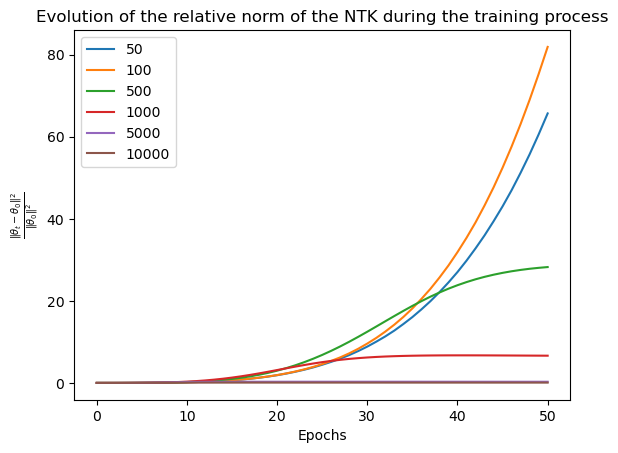

In [19]:
for dim in results_dict.keys():
    mean_results=np.mean(results_dict[dim], axis=0)
    plt.plot(mean_results, label=dim)

plt.xlabel('Epochs')
plt.ylabel(r'$\frac{\|\theta_t - \theta_0\|^2}{\|\theta_0\|^2}$')
plt.title("Evolution of the relative norm of the NTK during the training process")
plt.legend()
